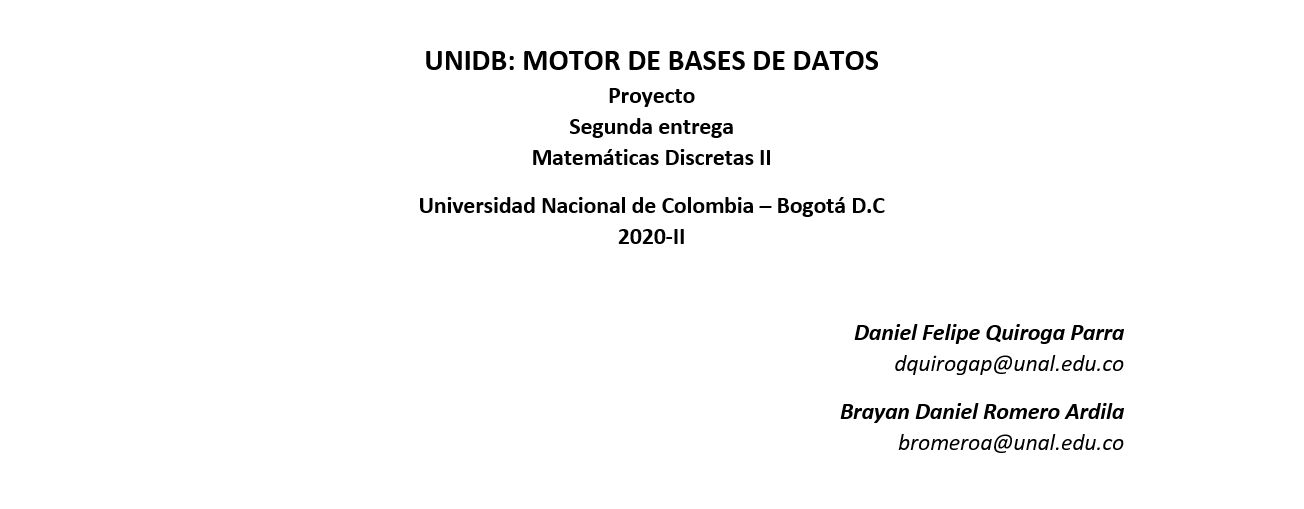









 > # **1. Introducción**

La recolección de datos tiene un propósito fundamental, estudiar y aprender de ellos. Desde hace siglos la humanidad desarrolló  la capacidad de almacenar datos, técnicas para evaluar su desempeño y metodologías para utilizar la información en nuevas investigaciones. Históricamente sabemos que el hombre comenzó a almacenar datos inconscientemente desde la revolución cognitiva, en donde tenía que contar las herramientas y generar nuevas técnicas de caza. Posteriormente, la revolución industrial ocasionó un aumento en esta habilidad al surgir una necesidad de llevar un “inventario”. Sin embargo, este proceso tomó real importancia hace relativamente poco, pues, fue desde la aparición de la escritura que realmente nació el concepto de “banco de datos”. A lo largo del tiempo, el ser humano fue implementado en las nuevas áreas del conocimiento (economía, administración, salud, c. sociales) procedimientos físicos para guardar registro de toda la información que más tarde utilizó para diseñar modelos sociales y prevenir decisiones equivocadas. Es decir, recurrieron a escribir todos los datos necesarios en libros y guardarlos de manera segura. 

Años más tarde, el almacenamiento de información se volvió un trabajo arduo y lento gracias al crecimiento exponencial de la población. Los métodos convencionales de consulta y modificación eran lentos y sujetos a muchos errores de diversa índole. Por ejemplo, el censo estadounidense de 1890 duró aproximadamente tres años ya que las personas encargadas de registrar no podían procesar la información de manera eficiente. Luego, llegó junto a la computadora electrónica lo que algunos llaman la primera revolución de las bases de datos. Pues, este nuevo dispositivo permitió una nueva forma organizada de guardar y recuperar la información en tiempos récord; y aunque significó una solución para su tiempo, no tardaron en aparecer ciertos inconvenientes. Debido a la novedad del computador, no estaba claro la manera más conveniente de organizar la información, lo que produjo cierta entropía entre las organizaciones. Por lo que desde ese momento se desarrollaron tecnologías y modelos que permitieron organizar la información. 

Hasta el día de hoy, se conocen diversos tipos de modelos de bases de datos. Tanto relacionales como no relacionales poseen sus fundamentos estructurados y diversas implementaciones. Sin embargo, en el último siglo el impacto del big data ha ido creciendo y las cantidades de información requerida y procesada es cada vez mayor. Por lo que aún conociendo los fundamentos de relaciones entre los datos, es imposible manejar toda la información localmente manteniendo la seguridad e integridad. Entonces, es necesario un sistema gestor de bases de datos (DBMS) que proporcione al usuario métodos y comandos que permitan la creación de una base de datos de forma intuitiva y segura.





**1.1 Estado del arte**

Actualmente existen diversas alternativas que permiten el manejo de bases de datos. Por el lado del modelo relacional existe Oracle, MySql, Sql y por el lado no relacional tenemos Firebase, MongoDB, apache cassandra y Big Table.  Cabe aclarar que las bases de datos relacionales tienen un mayor impacto, y así mismo, mayor cantidad de soporte y software disponible. Mientras que el conjunto de modelos no relaciones son relativamente nuevo y existen ciertas limitaciones teóricas y prácticas a la hora de implementar una nueva base de datos NoSQL. En adición, el rango de acción de los modelos nosql es bastante amplio por lo que nos limitamos a trabajar con el más utilizado en el mercado, las bases de datos basadas en documentos. Uno de los dbms más utilizados de este tipo es mongodb, pues este posee una gran aceptación de todo público pero tiene ciertas limitación en cuanto a relacionar información separada. De manera similar tenemos Google firestore que ofrece una gran cantidad de soporte a cambio de una cierta licencia y limitaciones en cuanto a la consistencia de datos y su seguridad. Al mirar los sistemas gestores actuales podemos encontrar una extensa lista de ventajas y desventajas que tiene cada uno, así como se mencionó con los ejemplos de Mongodb y Firestore. Esto se debe a que es “tecnología joven” y aún está siendo desarrollada por diversas entidades, por lo que, es necesario seguir investigando e implementando nuevas soluciones tecnológicas a este problema.

# **2. Métodos utilizados**

Para la implementación del motor de bases de datos se utilizaron cuatro algoritmos principales: la encriptación y desencriptación de los archivos JSON, la encriptación y desencriptación de los nombres de los archivos, el hashing de la contraseña del usuario root y los hashing de las colecciones y documentos de la base de datos. A continuación se describirán cada uno de estos algoritmos:

**2.1. Encriptación y desencriptación de JSON**

Este algoritmo utiliza el método de “affine chipher”, el cual consiste en dar un número a cada caracter, para posteriormente pasarlo a una función definida que transforma mediante operaciones aritméticas dicho número en otro, con el fin de cambiar los caracteres del mensaje inicial. Esta función hace uso de la aritmética modular para asegurarse de que la imágen se encuentre dentro rango de 0 y el número de caracteres posibles para encriptar. 

En la encriptación de los JSON se consideraron todos los códigos de caracteres ASCII (un total de 256 caracteres), debido a que en este tipo de texto se pueden encontrar caracteres tanto alfanuméricos como acentos y caracteres especiales.

El algoritmo de “affine chipher” es reversible, por lo que fue posible escribir otro método que desencriptara el mensaje, retornando así el diccionario JSON original.

Para que este algoritmo funcionara correctamente, se escogió 97 como coprimo de 256, ya que su inverso multiplicativo (-95) se puede utilizar para el algoritmo de desencriptación. En la sección de resultados se podrá visualizar este algoritmo y se podrán realizar las pruebas respectivas.

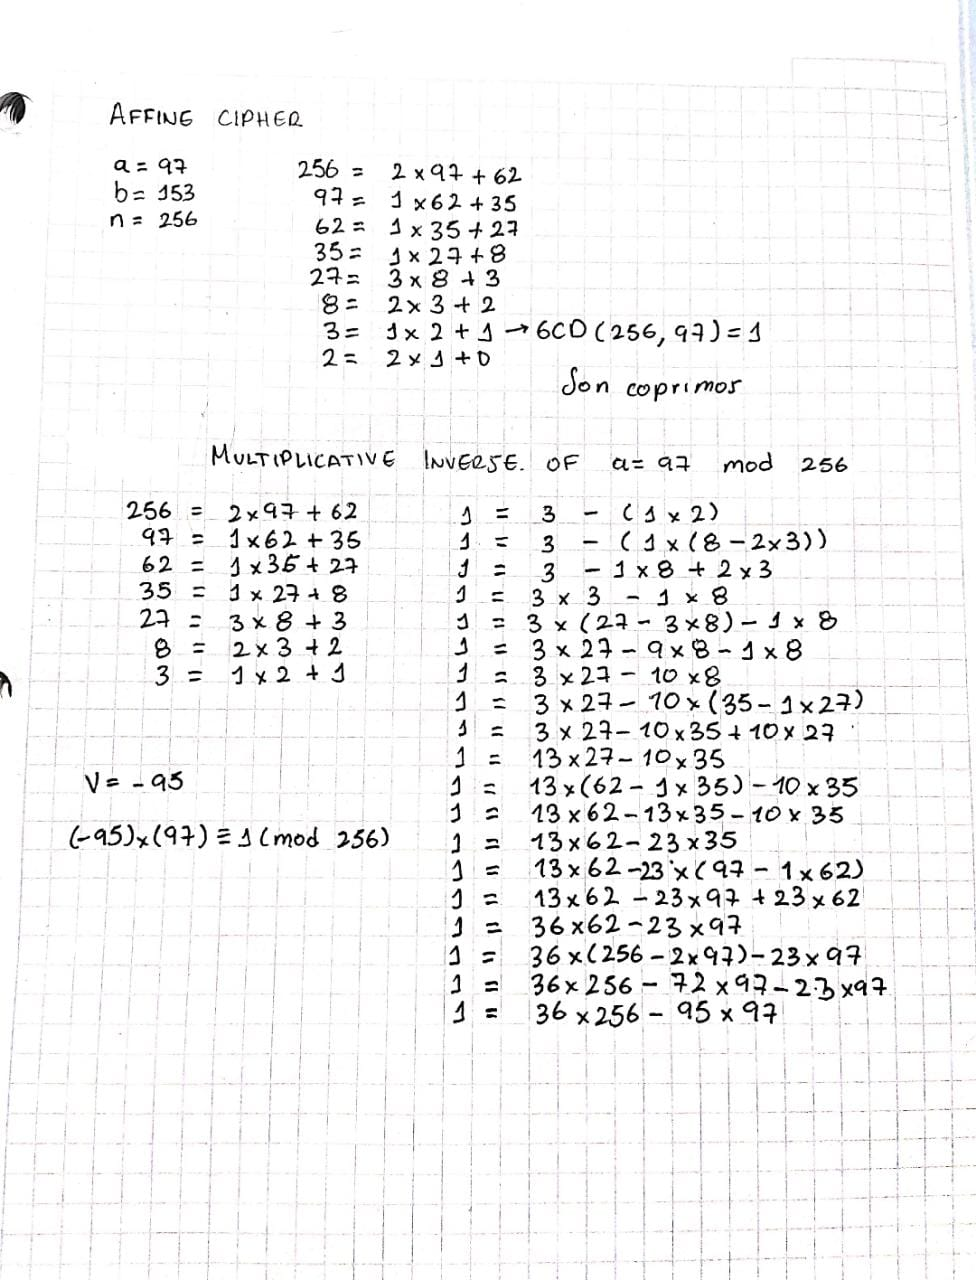

**2.2. Encriptación y desencriptación de nombres de archivos**

Al igual que el algoritmo anterior, para la encriptación de los nombres de archivos se utilizó el método de “affine chipher”. En este caso solamente se consideraron caracteres alfabéticos (incluyendo mayúsculas y minúsculas), caracteres numéricos (0-9) y el caracter “_”, ya que se deben cumplir las normas para nombrar archivos en el sistema operativo. Por esta razón se consideró 37 como coprimo de 63 (número de caracteres disponibles). En la sección de resultados se podrá visualizar este algoritmo y se podrán realizar las pruebas respectivas.

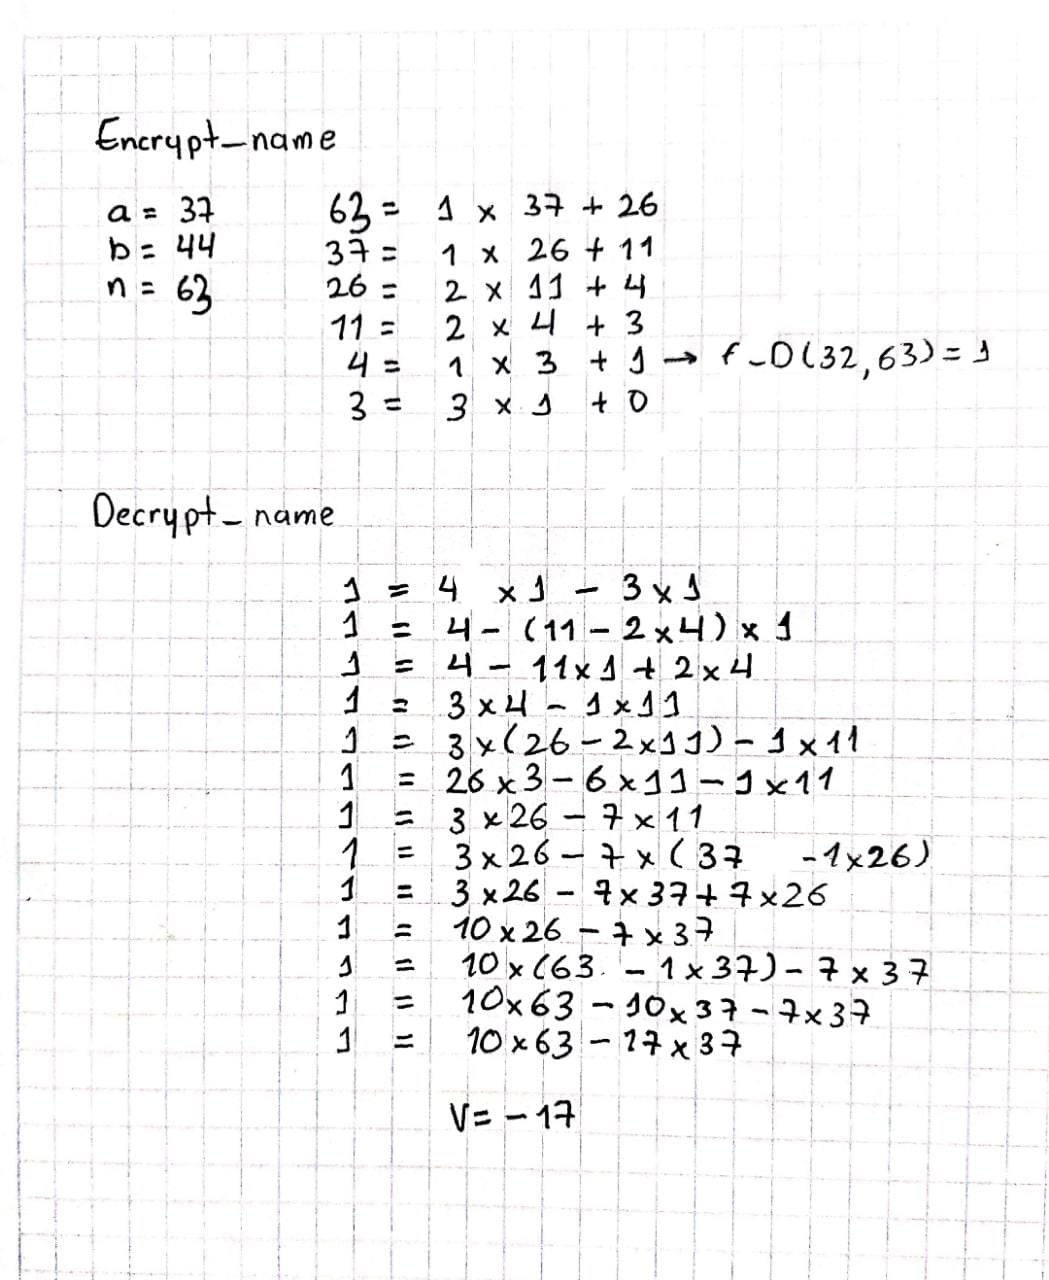

**2.3. Hashing de contraseña del usuario root.**

Al momento de manejar usuarios y contraseñas en nuestro software, fue necesario buscar la manera de mantener la confidencialidad de cada una de las claves que los usuarios puedan designar. Por ende, para el módulo de seguridad se implementó un algoritmo híbrido que se fundamenta en el famoso algoritmo SHA-256 e incluye ciertas características del código RSA y MD5. 

El primer paso de este algoritmo es representar la contraseña en valores binarios de acuerdo con el código internacional ASCII. Por motivos de seguridad buscamos que el valor generado sea independiente de la longitud que tenga la entrada, por lo que se añade un uno y ceros hasta que la longitud de la representación binaria sea congruente con 448 módulo 512. Lo que nos permite conocer exactamente su tamaño y dividir en chunks de cada 448 bits. una vez esto se completa, se inicializan ocho claves hash que se generan a partir de la raíz cuadrada de ciertos números.

Posteriormente, comienza el procesamiento de cada chunk, donde se divide el chunk en bloques de 32 bits y se almacena en un array. A partir del anterior arreglo, se modifican ciertos valores basándose en valores anteriores, operaciones binarias y sumas modulares. Entonces tenemos,

s0 = arr[i-15]>>7 XOR arr[i-15]>>18 XOR arr[i-15]>>3
s1 = arr[i-2]>>17 XOR arr[i-2]>>19 XOR arr[i-2]>>10
arr[i] = (arr[i-16] + s0 + arr[i-7] + s1) mod 2^32

Este paso es de real importancia ya que da el factor de seguridad al código. Como se puede evidenciar en el pseudocódigo anterior, se utiliza una serie de operaciones XOR y operaciones right shift. Esto es debido a que este tipo de operaciones no es reversible. Al momento de intentar hallar dos número que bajo el ó exclusivo de una sentencia determinada es casi imposible. Por ejemplo, dado 1101 podemos decir que los números generadores fueron 1100-0010 o 1001-0100.

Además cabe destacar que todas las sumas de este algoritmo se realizar modularmente bajo 2^32. Esto con motivo de que la suma de los operandos no se salgan del tamaño predeterminado que tenemos para bloque, pues


10001 + 10010 mod 2^5 = 100011 mod 2^5 = 000011
Por lo que sigue dentro de la longitud dada.

A lo largo de todo el algoritmo se utilizan más claves generadas de igual manera a las 8 primeras y se realizan otras operaciones binarias, tales como and, or, not para cerciorarse de evitar cualquier tipo de colisión. Durante el flujo de ejecución de modifican las claves y se concatenan al final, para ser convertidas a hexadecimal y guardadas en el respectivo sitio.

**2.4. Hashing de colecciones y documentos de la base de datos**





Para las búsquedas dentro del gestor de base de datos se utilizaron búsquedas hash. Entonces, cada colección que se genere contendrá un índice de tamaño predeterminado en el que guardará sus respectivos documentos. 

Al momento de insertar un nuevo documento se realiza una encriptación del nombre utilizando algoritmos anteriormente propuestos y se calcula un valor hash. este se realiza de la siguiente manera,

int value;

for each char in string:

	value += ascii( char )
    
hash = value % 311

Entonces se realiza una suma de todos los valores ascii de cada uno de los caracteres en el texto y se realiza una operación modular, donde value = hash mod 311. Para este ejercicio se realiza a base de un primo grande, esto con motivo de eliminar la probabilidad de colisiones dentro de la función hash. Cabe aclarar que en caso dado que dos valores tengan el mismo valor hash, se almacena un arreglo en el mismo índice.


# **3. Resultados**

A continuación se mostrarán las secciónes de código de los algoritmos mencionados anteriormente. En cada sección se pueden realizar las respectivas pruebas y resultados.

In [ ]:
import json

'''
ENCRIPTACIÓN Y DESENCRIPTACIÓN DE LOS JSON
'''


def encrypt_JSON(dic):  # E(x) ≡ ax + b (mod 256),
    dic_string = json.dumps(dic)
    encrypted = ""
    (a, b, n) = (97, 153, 256)
    for char in dic_string:
        x = ord(char)
        encrypted += chr(((x * a) + b) % n)
    return encrypted


def decrypt_JSON(str):  # D(y) ≡ v(y − b) (mod 256)
    (v, b, n) = (-95, 153, 256)
    decrypted = ""
    for char in str:
        y = ord(char)
        decrypted += chr((v * (y - b)) % n)
    dic = json.loads(decrypted)
    return dic

dic = {"Prueba_1" : True, "Test_2":34, "Prueba_3" : "Hola profe"}
enc = encrypt_JSON(dic)
desenc = decrypt_JSON(enc)
print("Diccionario original "+str(dic))
print("Diccionario encriptado "+enc)
print("Diccionario desencriptado "+str(desenc))

Diccionario original {'Prueba_1': True, 'Test_2': 34, 'Prueba_3': 'Hola profe'}
Diccionario encriptado 4{éËîÞ»Z*{¹ËîÞE¹{mÞ,{¹ìME¹{éËîÞ»Zì{¹{á¨Z¹	Ë¨?Þ{ö
Diccionario desencriptado {'Prueba_1': True, 'Test_2': 34, 'Prueba_3': 'Hola profe'}


In [1]:
'''
ENCRIPTACIÓN DE LOS NOMBRES DE LOS ARCHIVOS
'''

def encrypt_name(name):
    encrypted = ''
    (a, b, n) = (37, 44, 63)
    valid_char = {"a": 0, "b": 1, "c": 2, "d": 3, "e": 4, "f": 5, "g": 6, "h": 7, "i": 8, "j": 9, "k": 10, "l": 11,
                  "m": 12, "n": 13, "o": 14, "p": 15, "q": 16, "r": 17, "s": 18, "t": 19, "u": 20, "v": 21, "w": 22,
                  "x": 23, "y": 24, "z": 25, "A": 26, "B": 27, "C": 28, "D": 29, "E": 30, "F": 31, "G": 32, "H": 33,
                  "I": 34, "J": 35, "K": 36, "L": 37, "M": 38, "N": 39, "O": 40, "P": 41, "Q": 42, "R": 43, "S": 44,
                  "T": 45, "U": 46, "V": 47, "W": 48, "X": 49, "Y": 50, "Z": 51, "0": 52, "1": 53, "2": 54, "3": 55,
                  "4": 56, "5": 57, "6": 58, "7": 59, "8": 60, "9": 61, "_": 62}
    to_char = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_'

    for char in name:
        c = valid_char[char]
        encrypted += to_char[((c * a) + b) % n]
    return encrypted


def decrypt_name(name):
    (v, b, n) = (-17, 44, 63)
    valid_char = {"a": 0, "b": 1, "c": 2, "d": 3, "e": 4, "f": 5, "g": 6, "h": 7, "i": 8, "j": 9, "k": 10, "l": 11,
                  "m": 12, "n": 13, "o": 14, "p": 15, "q": 16, "r": 17, "s": 18, "t": 19, "u": 20, "v": 21, "w": 22,
                  "x": 23, "y": 24, "z": 25, "A": 26, "B": 27, "C": 28, "D": 29, "E": 30, "F": 31, "G": 32, "H": 33,
                  "I": 34, "J": 35, "K": 36, "L": 37, "M": 38, "N": 39, "O": 40, "P": 41, "Q": 42, "R": 43, "S": 44,
                  "T": 45, "U": 46, "V": 47, "W": 48, "X": 49, "Y": 50, "Z": 51, "0": 52, "1": 53, "2": 54, "3": 55,
                  "4": 56, "5": 57, "6": 58, "7": 59, "8": 60, "9": 61, "_": 62}
    to_char = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_'
    decrypted = ''
    for char in name:
        y = valid_char[char]
        decrypted += to_char[(v * (y - b)) % n]
    return decrypted

str = "PruebaDeEncriptacion_"
str_enc = encrypt_name(str)
print("string original: " + str)
print("String encriptado: "+ str_enc)
print("String desencriptado: "+ decrypt_name(str_enc))

string original: PruebaDeEncriptacion_
String encriptado: XRCdsSUduv3RzG2S3z6vh
String desencriptado: PruebaDeEncriptacion_


In [ ]:
'''
HASHING DE CONTRASEÑAS
'''

def to_binary(number, base=8):
    binary = bin(number)
    binary = binary[2:]
    while len(binary) < base:
        binary = '0' + binary
    return binary


def to_hex(number):
    hex_n = hex(number)
    hex_n = hex_n[2:]
    return hex_n


def rotate_right(x, n):
    return int(f"{x:032b}"[-n:] + f"{x:032b}"[:-n], 2)


def get_round_constants():
    return [0x428a2f98, 0x71374491, 0xb5c0fbcf, 0xe9b5dba5, 0x3956c25b, 0x59f111f1, 0x923f82a4, 0xab1c5ed5,
            0xd807aa98, 0x12835b01, 0x243185be, 0x550c7dc3, 0x72be5d74, 0x80deb1fe, 0x9bdc06a7, 0xc19bf174,
            0xe49b69c1, 0xefbe4786, 0x0fc19dc6, 0x240ca1cc, 0x2de92c6f, 0x4a7484aa, 0x5cb0a9dc, 0x76f988da,
            0x983e5152, 0xa831c66d, 0xb00327c8, 0xbf597fc7, 0xc6e00bf3, 0xd5a79147, 0x06ca6351, 0x14292967,
            0x27b70a85, 0x2e1b2138, 0x4d2c6dfc, 0x53380d13, 0x650a7354, 0x766a0abb, 0x81c2c92e, 0x92722c85,
            0xa2bfe8a1, 0xa81a664b, 0xc24b8b70, 0xc76c51a3, 0xd192e819, 0xd6990624, 0xf40e3585, 0x106aa070,
            0x19a4c116, 0x1e376c08, 0x2748774c, 0x34b0bcb5, 0x391c0cb3, 0x4ed8aa4a, 0x5b9cca4f, 0x682e6ff3,
            0x748f82ee, 0x78a5636f, 0x84c87814, 0x8cc70208, 0x90befffa, 0xa4506ceb, 0xbef9a3f7, 0xc67178f2]


def hash_password(password):
    binary_pass = ''.join(format(ord(i), 'b') for i in password)
    binary_pass += '1'
    while len(binary_pass) % 512 != 440:
        binary_pass += '0'

    length = len(password) % 256
    bin_len = to_binary(length)
    binary_pass += bin_len

    chink_size = 448
    chunks = [binary_pass[i:i+chink_size] for i in range(0, len(binary_pass), chink_size)]

    h0 = 0x6a09e667
    h1 = 0xbb67ae85
    h2 = 0x3c6ef372
    h3 = 0xa54ff53a
    h4 = 0x510e527f
    h5 = 0x9b05688c
    h6 = 0x1f83d9ab
    h7 = 0x5be0cd19

    round_constants = get_round_constants()

    for chunk in chunks:
        message_schedule = [int(chunk[i:i+32], 2) for i in range(0,len(chunk), 32)]

        while len(message_schedule) < 64:
            message_schedule.append(0)

        for i in range(16, 64):
            s0 = rotate_right(message_schedule[i-15], 7) ^ rotate_right(message_schedule[i-15], 18) ^ (message_schedule[i-15] >> 3)
            s1 = rotate_right(message_schedule[i-2], 17) ^ rotate_right(message_schedule[i-2], 19) ^ (message_schedule[i-2] >> 10)
            sum1 = (message_schedule[i-16] + s0) % (2 ** 32)
            sum2 = (message_schedule[i-7] + s0) % (2 ** 32)
            message_schedule[i] = (sum1 + sum2) % (2 ** 32)

        a = h0
        b = h1
        c = h2
        d = h3
        e = h4
        f = h5
        g = h6
        h = h7

        for i in range(0, 64):
            s1 = rotate_right(e, 6) ^ rotate_right(e, 11) ^ rotate_right(e, 25)
            ch = (e & f) ^ ((~e) & g)
            temp1 = (h + s1 + ch + round_constants[i] + message_schedule[i]) % (2**32)
            s0 = rotate_right(a, 2) ^ rotate_right(a, 13) ^ rotate_right(a, 22)
            temp2 = (a & b) ^ (a & c) ^ (b & c)
            temp3 = (s0 + temp2) % (2**32)

            h = g
            g = f
            f = e
            e = d + temp1
            d = c
            c = b
            b = a
            a = temp1 + temp3

        h0 = (h + a) % (2**32)
        h1 = (h1 + b) % (2**32)
        h2 = (h2 + c) % (2**32)
        h3 = (h3 + d) % (2**32)
        h4 = (h4 + e) % (2**32)
        h5 = (h5 + f) % (2**32)
        h6 = (h6 + g) % (2**32)
        h7 = (h7 + h) % (2**32)

    hash = to_hex(h0)+to_hex(h1)+to_hex(h2)+to_hex(h3)+to_hex(h4)+to_hex(h5)+to_hex(h6)+to_hex(h7)

    return hash


def hash_value(name):
    value = 0
    for char in name:
        value += ord(char)
    value %= 311
    return value

password = "ContrasennaSegura123"
print("contraseña original: " + password)
print("contraseña con hash: " + hash_password(password))

contraseña original: ContrasennaSegura123
contraseña con hash: 617ece3953d425b1cb9b8a9f5ca300ce4eb0c2d885b6986037c4c72213e32c58


# **4. Nuevas funcionalidades**

Para la entrega final se subió el repositorio a GitHub para que se pueda acceder al código desde esta plataforma (Link de acceso: https://github.com/DanielQuirogaP/UniDB.git). 

Al iniciar el main del proyecto se mostrarán algunos mensajes en consola:

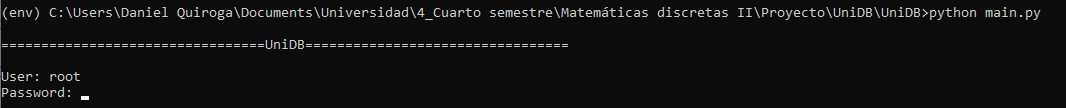

Inicialmente se pedirá una contraseña para el usuario "root", la cual es '1234'. En caso de ser la primera vez que se ingresa a la aplicación, se pedirá crear una contraseña que se encriptará y luego se pedirá cada vez que se desee iniciar la aplicación.

Luego de ingresar la contraseña se cuentan con los siguientes comandos principales:


**use:** Se requiere para iniciar una base de datos o crear una nueva. En caso de no existir la base de datos especificada, se creará una carpeta nueva en la sección "dbs", aquí se guardarán todos los archivos de esta base de datos. (Ejemplo de uso: use museo_db).

**exit:** Se utiliza para salir de la aplicación.

**db.:** Se usa para acceder a los comandos de acceso a la base de datos. Hasta el momento se ha implementado solamente las operaciones "getDocs()", "put({...})" para las colecciones (las cuales se acceden mediante "**coll**"), mientras que para los documentos (los cuales se acceden mediante "**doc**") se implementaron "get()", "put({...})" y "update({...})". 

Ejemplos de uso:

    db.coll("user").getDocs()
    db.coll("user").doc("danielqp").get()
    db.coll("user").doc("danielromero").update({"name":"Daniel Romero"})
    db.coll("user").doc("danielromero").coll("fav_auhors").getDocs()

De momento solamente se pueden encontrar dichos comandos, ya que la aplicación se encuentra en versión beta. Sin embargo, a futuro se piensan implementar más métodos para complementar el funcionamiento del motor de bases de datos.

A continuación se mostrará la evidencia del funcionamiento de la aplicación:


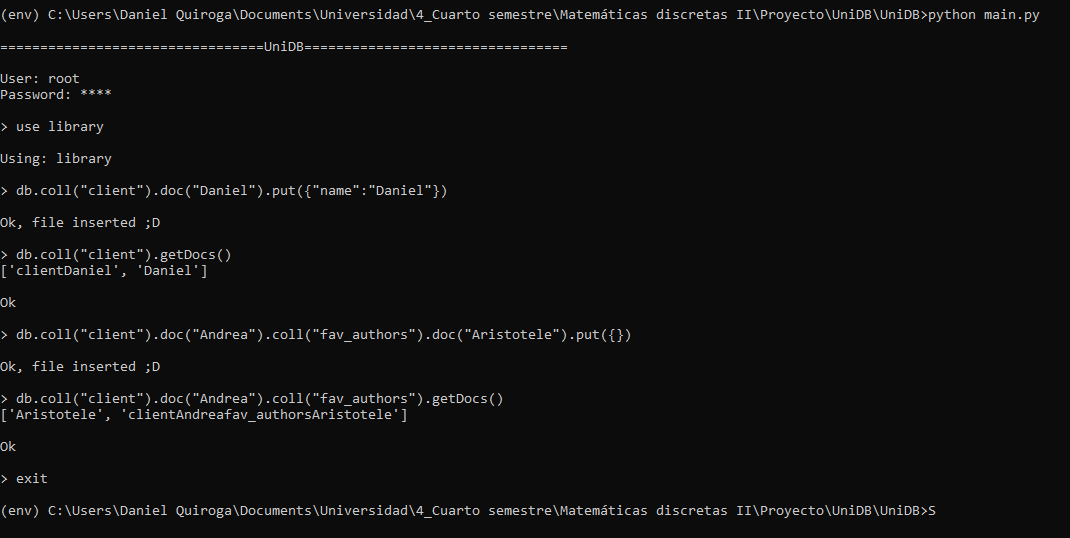

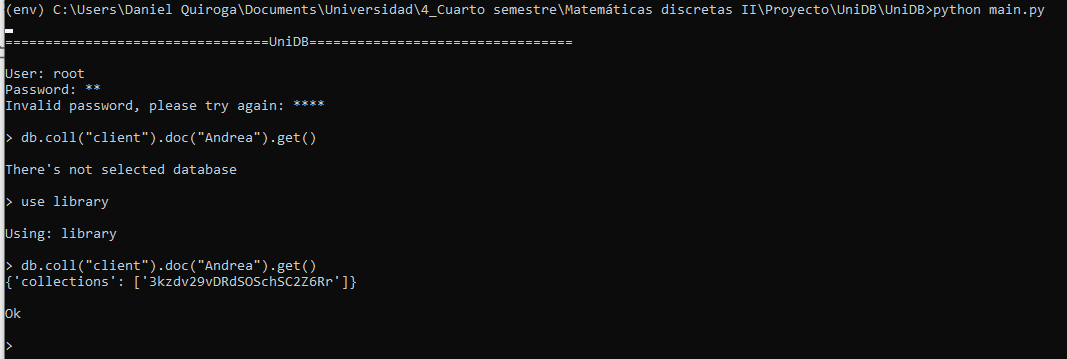

Finalmente, así queda la estructura de la carpeta para la base de datos de "library":

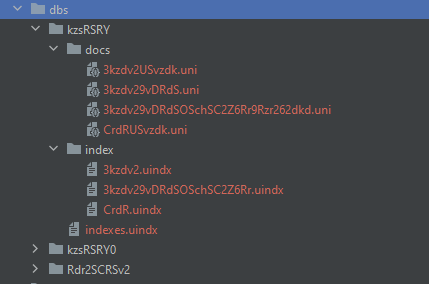

La encriptación de uno de los archivos:

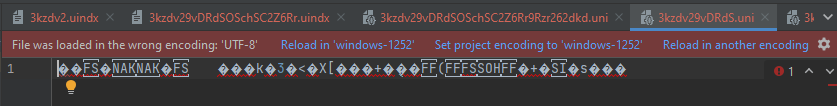

# **5. Conclusiones**

Las bases de datos son uno de los recursos más utilizados a la hora de hablar de cualquier software. La cantidad de información guardada y cantidad de operaciones que se deben hacer sobre ella es incomparable a lo necesitado en décadas anteriores. Además, nace la necesidad de interconectar diferentes ordenadores a un mismo banco de datos. Entonces, es aquí donde queda clara la necesidad de un sistema gestor de bases de datos para que la implementación de una base de datos sea efectiva.

Estos sistemas no son nuevos en el mercado y hablando de modelos SQL existe una extensa lista de motores que permiten a cada uno de los usuarios configurar la información a su gusto y se acopla a las necesidades del proyecto. Sin embargo, en las últimas décadas con la aparición del nuevo paradigma no relacional, es necesario investigar, desarrollar e implementar nuevas tecnologías generalizadas al problema dado. 


# **6. Referencias bibliográficas**

Kumar, Sandeep & Gupta, Er Piyush. (2014). A Comparative Analysis of SHA and MD5 Algorithm. International Journal of Computer Science and Information Technologies. 5. 4492 - 4495. 

Derrick Rountree. (2011). Security for Microsoft Windows System Administrators.

James T. Streib, Takako Soma. (2017. ). Guide to Data Structures A Concise Introduction Using Java. Springer.

Guy Harrison. (2015). Next Generation Databases. Apress

Jolita Ralyté, Xavier Franch, Sjaak Brinkkemper, Stanisław Wrycza (Eds.). (2012). Advanced Information Systems Engineering. Springer.

Jean-Philippe Aumasson, Willi Meier Raphael C.-W. Phan, Luca Henzen. (2014). The Hash Function BLAKE. Springer
